# Predicting Cancer Data With ML Models
**We will apply different ML algorithm to a data set with 570 cancer cells and 30 features to determine whether the cancer cells in our data are benign or malignant**

<a id = "1"></a>
#Library and Input File

In [2]:
#Library
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #data graph drawing
import seaborn as sns # for statistical data visualization
from sklearn.neighbors import KNeighborsClassifier # KNN
from sklearn.svm import SVC # SVM



<a id = "2"></a>
#Load and Check Data
**We examined the general features of data**

In [3]:
#İnput File
from google.colab import drive
drive.mount('/content/drive')
data = pd.read_csv("/content/drive/My Drive/Cancer_Data.csv")

data.info() # general information of the data
print(data["Unnamed: 32"]) # a column that is completely null
print(data["id"]) # an unnecessary value for the algorithm
data.tail()



Mounted at /content/drive
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


## EDA

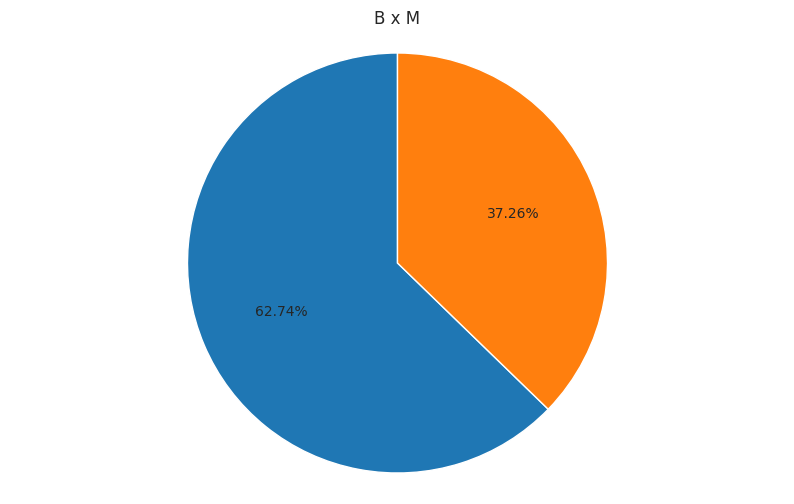

In [4]:
plt.figure(figsize=(10,6))
sns.set_style("whitegrid")
plt.pie(data['diagnosis'].value_counts(),autopct='%1.2f%%', startangle=90)
plt.axis('equal')
plt.title("B x M")
plt.show()

<a id = "3"></a>
#Data manipulation
**Extracted unnecessary features from the data**

In [5]:
data.drop(["id","Unnamed: 32"], axis = 1, inplace = True) #"axis = 1" indicates to delete the whole column |"inpalce = True" means replace master data, does not create a copy
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

<a id = "4"></a>
#Data Graph
**We will analyze the distribution of benign (B) and malignant (M) cancers in the data on the graph with two unique features**

**"M" = Malignant Cancer**

**"B" = Benign Cancer**

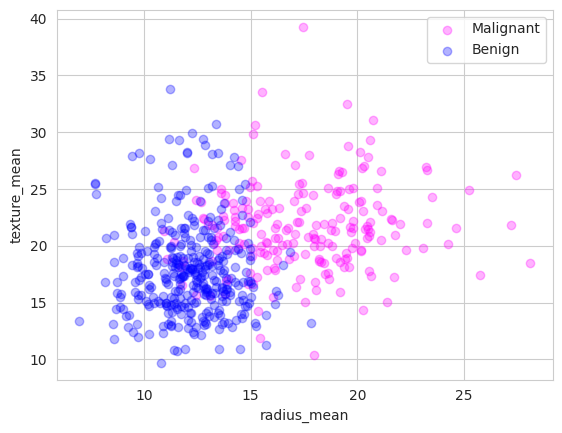

In [6]:

M = data[data.diagnosis == "M"] #Diagnosis transfers all values of M to M data
B = data[data.diagnosis == "B"] #Diagnosis transfers all values of B to B data

plt.scatter(M.radius_mean,M.texture_mean, color = "magenta", label = "Malignant", alpha = 0.3)
plt.scatter(B.radius_mean,B.texture_mean, color = "blue", label = "Benign", alpha = 0.3)

plt.xlabel("radius_mean")
plt.ylabel("texture_mean")

plt.legend()
plt.show()

<a id = "5"></a>
#Diagnosis Change 0 or 1
**In order for the data to enter the classification algorithm and receive processing, it must not be object structured, so we convert this data into 1 and 0.**

**1 = M (Malignant Cancer Cell)**

**0 = B (Benign Cancer Cell)**

In [7]:
data.diagnosis = [1 if each == "M" else 0 for each in data.diagnosis]
y = data.diagnosis
x_data = data.drop(["diagnosis"],axis = 1)
print("X Data \n",x_data)
print("Y Data \n",y)

X Data 
      radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     compactness_mean  concavity_mean  concave points_

<a id = "6"></a>
#Data Normalization
**We reduce all data to values between 0 and 1 so that operations can be performed and so that very large or very small values in the data cannot manipulate the data**

In [8]:
x = (x_data - np.min(x_data))/(np.max(x_data) - np.min(x_data))

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)


In [9]:
# X data info
x

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.690000,0.428813,0.678668,0.566490,0.526948,0.296055,0.571462,0.690358,0.336364,0.132056,...,0.623266,0.383262,0.576174,0.452664,0.461137,0.178527,0.328035,0.761512,0.097575,0.105667
565,0.622320,0.626987,0.604036,0.474019,0.407782,0.257714,0.337395,0.486630,0.349495,0.113100,...,0.560655,0.699094,0.520892,0.379915,0.300007,0.159997,0.256789,0.559450,0.198502,0.074315
566,0.455251,0.621238,0.445788,0.303118,0.288165,0.254340,0.216753,0.263519,0.267677,0.137321,...,0.393099,0.589019,0.379949,0.230731,0.282177,0.273705,0.271805,0.487285,0.128721,0.151909
567,0.644564,0.663510,0.665538,0.475716,0.588336,0.790197,0.823336,0.755467,0.675253,0.425442,...,0.633582,0.730277,0.668310,0.402035,0.619626,0.815758,0.749760,0.910653,0.497142,0.452315


<a id = "7"></a>
#Train and Test  Split
**Main data was divided into 70% training data and 30% test data**

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state=1)

In [11]:
# X_train data info
print("X Train")
x_train

X Train


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
249,0.214823,0.176530,0.207864,0.111474,0.439379,0.180050,0.101406,0.145577,0.415657,0.246841,...,0.167912,0.244403,0.151751,0.075354,0.447269,0.127010,0.144089,0.330172,0.216637,0.151187
58,0.287236,0.324653,0.268261,0.162757,0.252505,0.056776,0.001621,0.020711,0.383333,0.106361,...,0.224120,0.272655,0.198366,0.107870,0.204253,0.033588,0.001474,0.038179,0.172285,0.051489
476,0.341663,0.365911,0.335982,0.201442,0.331137,0.280412,0.118627,0.151988,0.225253,0.213353,...,0.303095,0.406183,0.307236,0.158106,0.291422,0.306206,0.200639,0.460137,0.191011,0.154401
529,0.240854,0.126141,0.235229,0.127975,0.517920,0.216889,0.088590,0.139066,0.301515,0.339511,...,0.196371,0.099947,0.181832,0.089633,0.534438,0.131861,0.129553,0.254055,0.239700,0.167126
422,0.219083,0.213392,0.218851,0.112280,0.507087,0.298816,0.166284,0.223509,0.417172,0.278854,...,0.167556,0.203891,0.156980,0.071397,0.464439,0.184058,0.183866,0.379725,0.240883,0.126131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,0.606228,0.521136,0.598507,0.444751,0.441184,0.427949,0.596298,0.571074,0.576768,0.235257,...,0.522946,0.574627,0.489516,0.345016,0.371987,0.348119,0.453115,0.595189,0.342992,0.194215
144,0.178380,0.177883,0.169097,0.089841,0.228401,0.098184,0.052741,0.039140,0.171212,0.145746,...,0.143010,0.231876,0.136361,0.062918,0.240573,0.092179,0.077915,0.117285,0.144885,0.082973
72,0.483648,0.500845,0.486559,0.333362,0.491740,0.501871,0.396439,0.394831,0.437879,0.314027,...,0.547492,0.581023,0.503959,0.367627,0.576702,0.690893,0.524441,0.652577,0.344569,0.517250
235,0.333617,0.390260,0.317877,0.195080,0.343685,0.153580,0.034255,0.094235,0.230808,0.176706,...,0.263252,0.486674,0.238358,0.130333,0.379912,0.120315,0.049768,0.273643,0.130298,0.138594


In [12]:
# y_train data info
print("Y Train")
y_train

Y Train


249    0
58     0
476    0
529    0
422    0
      ..
129    1
144    0
72     1
235    0
37     0
Name: diagnosis, Length: 398, dtype: int64

In [13]:
print("X Test")
x_test

X Test


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
421,0.364854,0.144403,0.376132,0.217434,0.455629,0.503711,0.339738,0.313121,0.518182,0.507582,...,0.303451,0.168443,0.317197,0.153362,0.396421,0.326193,0.257109,0.380756,0.248768,0.242949
47,0.292915,0.302672,0.291549,0.165896,0.570281,0.318140,0.287254,0.364811,0.539394,0.375105,...,0.275347,0.424574,0.260919,0.141123,0.709437,0.377711,0.399840,0.717526,0.460280,0.412305
292,0.282503,0.213392,0.271923,0.157031,0.432157,0.184191,0.144213,0.167495,0.338384,0.310447,...,0.206688,0.210821,0.191245,0.098358,0.509344,0.174162,0.178994,0.362887,0.357776,0.267611
186,0.536182,0.299966,0.516965,0.380700,0.300172,0.200294,0.191401,0.288966,0.283333,0.090354,...,0.475987,0.382196,0.442203,0.301022,0.344912,0.210738,0.282588,0.539863,0.323477,0.094057
414,0.385678,0.679743,0.365697,0.244327,0.275977,0.081805,0.109794,0.136133,0.400000,0.062763,...,0.331910,0.663380,0.297276,0.183396,0.288120,0.069244,0.123562,0.225945,0.328800,0.043356
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6,0.533343,0.347311,0.523875,0.380276,0.379164,0.274891,0.264058,0.367793,0.370707,0.157119,...,0.531839,0.416844,0.511928,0.349194,0.482269,0.223448,0.302236,0.663918,0.295289,0.187853
487,0.589663,0.308083,0.582614,0.434146,0.507990,0.384700,0.528585,0.593439,0.385354,0.235678,...,0.570260,0.489606,0.515414,0.382127,0.529816,0.334924,0.474121,0.707904,0.335305,0.229896
11,0.416442,0.276632,0.413309,0.270414,0.401462,0.336850,0.233224,0.328330,0.394949,0.228728,...,0.444326,0.406716,0.428756,0.273742,0.451892,0.517711,0.316693,0.621993,0.438991,0.326381
268,0.278716,0.219817,0.266671,0.156394,0.375734,0.131311,0.091378,0.080268,0.479798,0.162805,...,0.212380,0.309701,0.193536,0.101332,0.359440,0.148936,0.159105,0.198625,0.401932,0.102191


In [14]:
print("Y Test")
y_test

Y Test


421    0
47     1
292    0
186    1
414    1
      ..
6      1
487    1
11     1
268    0
419    0
Name: diagnosis, Length: 171, dtype: int64

<a id = "8"></a>
#Find K Values
**We draw a graph to find the perfect k values**

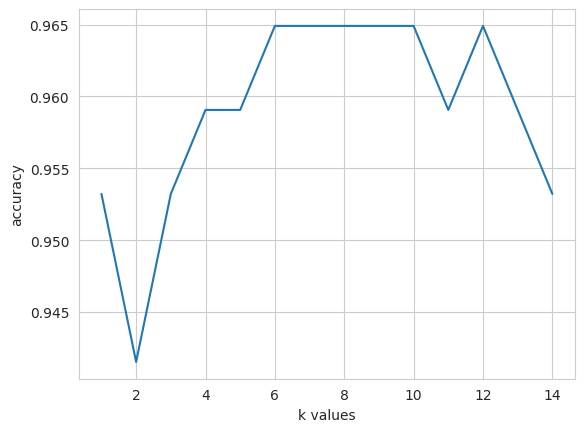

In [15]:
from sklearn.neighbors import KNeighborsClassifier
Score_list = []

for each in range(1,15):
    knn2 = KNeighborsClassifier(n_neighbors = each)
    knn2.fit(x_train,y_train)
    Score_list.append(knn2.score(x_test,y_test))

plt.plot(range(1,15),Score_list)
plt.xlabel("k values")
plt.ylabel("accuracy")
plt.show()

<a id = "9"></a>
#K-NN Model
**Here we examine the accuracy score of the K-nn Model and we get a score of 0.953216373742690059 which indicates that we have trained a good model in general, of course, better results can be obtained by playing with the values.**

In [16]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)
print("K = {}: Accuracy: {}".format(3,knn.score(x_test,y_test)))

K = 3: Accuracy: 0.9532163742690059


<a id = "10"></a>
#SVM Model

In [17]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svc=SVC(C=100.0)
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)
print('Model accuracy score with rbf kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with rbf kernel and C=100.0 : 0.9474


In [18]:
linear_svc100=SVC(kernel='linear', C=100.0)
linear_svc100.fit(x_train, y_train)
y_pred=linear_svc100.predict(x_test)
print('Model accuracy score with linear kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with linear kernel and C=100.0 : 0.9591


In [19]:
y_pred_train = linear_svc100.predict(x_train)
y_pred_train

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,

In [20]:
y_pred_test = linear_svc100.predict(x_test)
y_pred_test

array([0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0])

In [21]:
print('Training set score: {:.4f}'.format(linear_svc100.score(x_train, y_train)))
print('Test set score: {:.4f}'.format(linear_svc100.score(x_test, y_test)))

Training set score: 0.9925
Test set score: 0.9591


In [22]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[104   4]
 [  3  60]]

True Positives(TP) =  104

True Negatives(TN) =  60

False Positives(FP) =  4

False Negatives(FN) =  3


<Axes: >

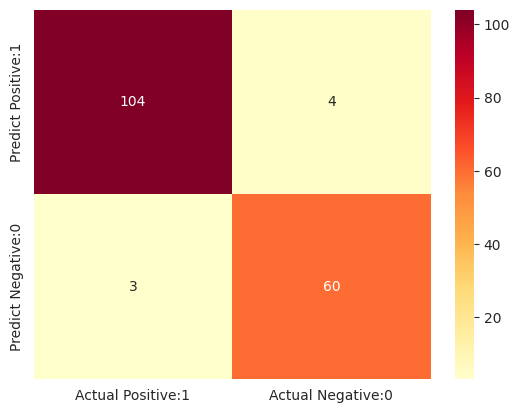

In [23]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlOrRd')

In [24]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97       108
           1       0.94      0.95      0.94        63

    accuracy                           0.96       171
   macro avg       0.95      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



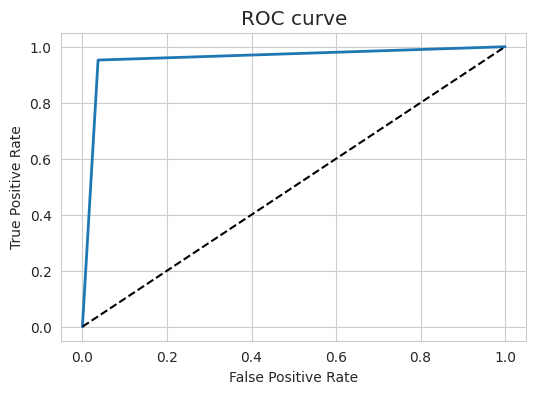

In [25]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve')

plt.xlabel('False Positive Rate')

plt.ylabel('True Positive Rate')

plt.show()